1в) Выделение границы связной области. На вход подается изображение. Граница связной области задается одним цветом. Имея начальную точку границы организовать ее обход, занося точки в список в порядке обхода. Начальную точку границы можно получать любым способом. Для контроля полученную границу прорисовать поверх исходного изображения.

In [22]:

from matplotlib.backend_bases import MouseButton
from matplotlib.widgets import Button

import tkinter as tk
from tkinter import filedialog

%matplotlib tk

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img1 = Image.open('image1.jpg')
img1 = img1.convert("RGB")
arr1 = np.array(img1)
img2 = Image.open('image2.jpg')
img2 = img2.convert("RGB")
arr2 = np.array(img2)
img3 = Image.open('image3.jpg')
img3 = img3.convert("RGB")
arr3 = np.array(img3)
img4 = Image.open('image4.jpg')
img4 = img4.convert("RGB")
arr4 = np.array(img4)
img5 = Image.open('image5.jpg')
img5 = img5.convert("RGB")
arr5 = np.array(img5)


In [24]:

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].imshow(img1)
axes[0, 0].set_title('----1----')
axes[0, 1].imshow(img2) 
axes[0, 1].set_title('----2----')
axes[0, 2].imshow(img3)
axes[0, 2].set_title('----3----')
axes[1, 0].imshow(img4) 
axes[1, 0].set_title('----4----')
axes[1, 1].imshow(img5) 
axes[1, 1].set_title('----5----')
axes[1, 2].axis('off')
plt.show()

In [25]:


def get_next_border_point(cur_x,cur_y,direction):
    if(direction==0):
        return cur_x+1,cur_y
    if(direction==1):
        return cur_x+1,cur_y-1
    if(direction==2):
        return cur_x,cur_y-1
    if(direction==3):
        return cur_x-1,cur_y-1
    if(direction==4):
        return cur_x-1,cur_y
    if(direction==5):
        return cur_x-1,cur_y+1
    if(direction==6):
        return cur_x,cur_y+1
    if(direction==7):
        return cur_x+1,cur_y+1
    return None

In [27]:
start_x = img1.width//2
start_y = img1.height//2

def get_border(image_arr,start_x,start_y):
    
    start_color = image_arr[start_x,start_y]
    cur_x = start_x+1
    cur_color = image_arr[cur_x,start_y]

    while(cur_x+1<image_arr.shape[0] & np.allclose(cur_color,start_color,atol=10)):
        cur_x += 1
        cur_color = image_arr[cur_x,start_y]
    border = []
    border_color = cur_color
    start_point = [cur_x,start_y]
    border.append(start_point)
    cur_y = start_y
    prev_ind = 0
    prev_direction = 6
    while(prev_ind<1000):#в первый раз идем вниз, во второй налево, потом наверх
        new_direction = (prev_direction - 2 + 8) % 8
        next_point = get_next_border_point(cur_x, cur_y, new_direction)
        if next_point is None:
            print("Ошибка: Получена недопустимая координата.")
            break
        cur_x, cur_y = next_point
        while(not np.allclose(image_arr[cur_x,start_y],border_color,atol=10)):
            new_direction = new_direction+ 1%8
            cur_x,cur_y = get_next_border_point(cur_x,cur_y,new_direction)
        prev_ind += 1
        if(np.array_equal(start_point,[cur_x,cur_y])):
            break
    return border





Задание 3. Выполнить градиентное окрашивание произвольного треугольника, у которого все три вершины разного цвета, используя алгоритм растеризации треугольника.

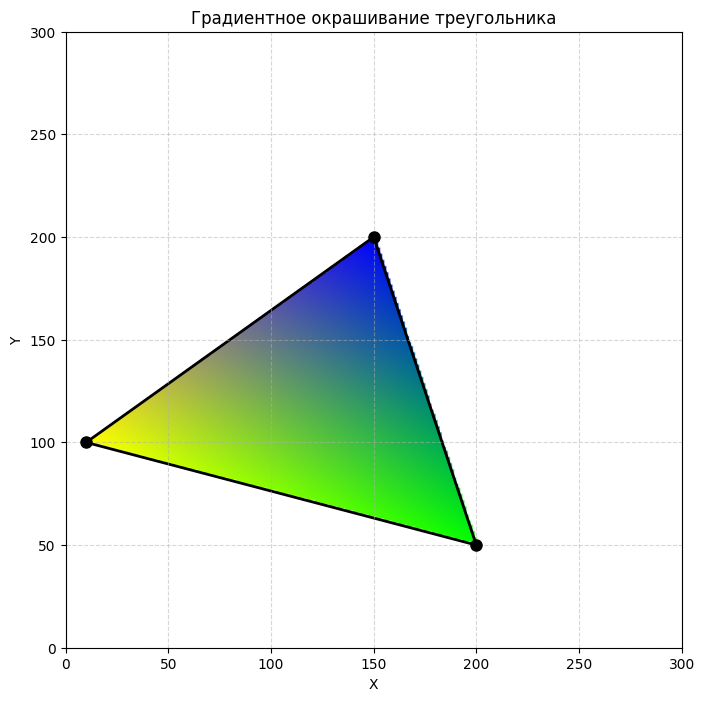

In [ ]:
from matplotlib.patches import Polygon

# Вершины в виде (x, y)
vertices = np.array([
    [10, 100],  
    [200, 50],  
    [150, 200] 
])

# Цвета в формате RGB (от 0 до 1)
colors = np.array([
    [1.0, 1.0, 0.0],  
    [0.0, 1.0, 0.0],  
    [0.0, 0.0, 1.0]   
])

def get_barycentric_coords(p, v1, v2, v3):
    """
    Вычисляет барицентрические координаты точки p относительно треугольника (v1, v2, v3).
    Возвращает None, если точка не внутри треугольника.
    """
    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    p = np.array(p)

    # Векторы сторон треугольника
    vec_v2_v1 = v2 - v1
    vec_v3_v1 = v3 - v1
    vec_p_v1 = p - v1

    # Вычисляем знаменатель для барицентрических координат
    # Это удвоенная площадь треугольника
    denom = (vec_v2_v1[0] * vec_v3_v1[1] - vec_v3_v1[0] * vec_v2_v1[1])

    # Если знаменатель равен нулю, треугольник вырожденный (вершины лежат на одной прямой)
    if np.abs(denom) < 1e-9:
        return None

    lambda_2 = (vec_p_v1[0] * vec_v3_v1[1] - vec_v3_v1[0] * vec_p_v1[1]) / denom
    lambda_3 = (vec_v2_v1[0] * vec_p_v1[1] - vec_p_v1[0] * vec_v2_v1[1]) / denom
    lambda_1 = 1.0 - lambda_2 - lambda_3

    if 0 <= lambda_1 <= 1 and 0 <= lambda_2 <= 1 and 0 <= lambda_3 <= 1:
        return np.array([lambda_1, lambda_2, lambda_3])
    else:
        return None

# --- Алгоритм растеризации ---
# Определяем границы изображения
img_width = 300
img_height = 300

framebuffer = np.ones((img_height, img_width, 3))

# Находим ограничивающий прямоугольник
min_x = int(np.min(vertices[:, 0]))
max_x = int(np.max(vertices[:, 0]))
min_y = int(np.min(vertices[:, 1]))
max_y = int(np.max(vertices[:, 1]))

# границы не выходят за пределы framebuffer
min_x = max(0, min_x)
max_x = min(img_width - 1, max_x)
min_y = max(0, min_y)
max_y = min(img_height - 1, max_y)


for y in range(min_y, max_y + 1):
    for x in range(min_x, max_x + 1):
        p = np.array([x, y])

        bary_coords = get_barycentric_coords(p, vertices[0], vertices[1], vertices[2])

        if bary_coords is not None:
            interpolated_color = (
                bary_coords[0] * colors[0] +
                bary_coords[1] * colors[1] +
                bary_coords[2] * colors[2]
            )
            interpolated_color = np.clip(interpolated_color, 0, 1)
            framebuffer[y, x] = interpolated_color

plt.figure(figsize=(8, 8))
plt.imshow(framebuffer, origin='lower', extent=[0, img_width, 0, img_height])
triangle = Polygon(vertices, closed=True, fill=None, edgecolor='black', linewidth=2)
plt.gca().add_patch(triangle)
plt.plot(vertices[:, 0], vertices[:, 1], 'o', color='black', markersize=8)
plt.title("Градиентное окрашивание треугольника")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, img_width)
plt.ylim(0, img_height)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()